## Functions, Derivatives and Gradients

In this lesson, we will discuss the absolute fundamentals of linear algebra that apply to machine learning and AI, including:

- Functions
- Derivatives
- Gradients

### Functions

A function is a relationship between elements $x$ of a set $X$ and elements $y$ of another set $Y$.

The set $X$ is formally called the **domain** of the function. E.g. $X = [-3, 3]$

The set $Y$ is formally called the **co-domain** of the function. E.g. $Y = [3, -3]$

In this case, the relationship between $x$ and $y$ is expressed as $y = -x$.

A function has a name. Typically the name used is $f$.

Given the name $f$, the relationship beetween $x$ and $y$ is expressed as

$$
y = f(x)
$$

Notes:
  - the equation above is read $y$ is equal to $f$ of $x$
  - $x$ is the *input* or *variable* of the function
  - $y$ is the *ouput* or *value* of the function
  - $f$ is the *function*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

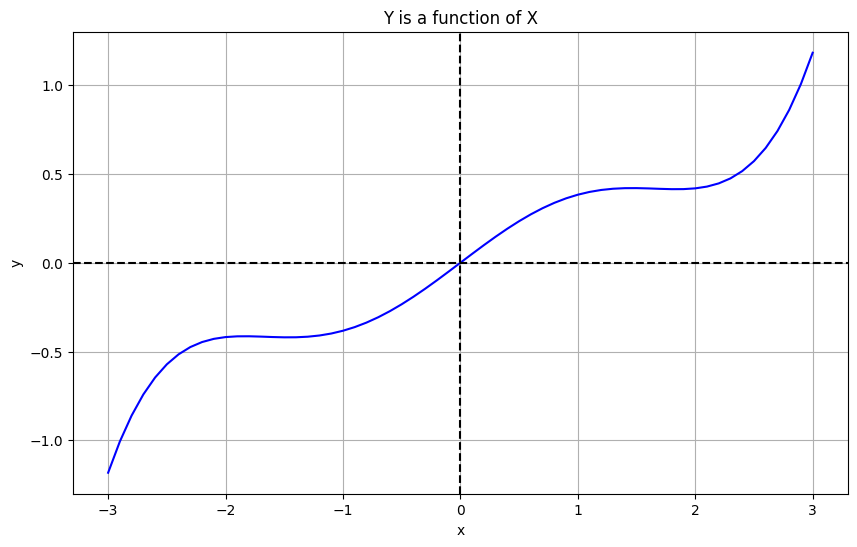

In [13]:
x = np.arange(-3, 3.1, 0.1)  # Range from -3 to 3 with steps of 0.1
y = 0.2 * (x**3) - 1.5 * x + 2 * np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.title('Y is a function of X')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

The graph above displays a function of a single variable $x$. It is a smooth function that varies (i.e. has a value of $y$) that varies betwen -3 and 3.

### Understanding Minima in Functions

Imagine you're planning a hike along a trail that goes through hills and valleys. The graph above represents the elevation of this trail as you walk along it. Here's how we can understand minima using this example:

1. **What is a minimum?**
   A minimum is a point where the elevation is lower than the areas immediately around it. In hiking terms, it's like being in a valley.

2. **Local Minimum:**
   A local minimum is like a small valley along your hike. It's the lowest point in its immediate surroundings, but there might be even lower points elsewhere on the trail. In our graph below, these are the points marked as "Local Minimum".

3. **Global Minimum:**
   The global minimum is the absolute lowest point on the entire trail. It's the deepest valley you'll encounter during your whole hike. In our graph, this is marked as "Global Minimum".

4. **Why are minima important?**
   - In hiking, knowing where the valleys are helps you plan your energy use and rest stops.
   - In mathematics and science, finding minima can help solve many real-world problems:
     - Finding the most efficient route (lowest fuel consumption)
     - Optimizing costs in business (lowest expenses)
     - In machine learning, training algorithms often involves finding the minimum of an error function.

5. **Intuition:**
   - Think of a ball rolling down a hill. It will naturally come to rest at a minimum point.
   - In many optimization problems, we're trying to find this "resting point" where things are at their *best* (or *least costly*) state.

By understanding minima, you're grasping a fundamental concept used in many areas of science, engineering, and data analysis!

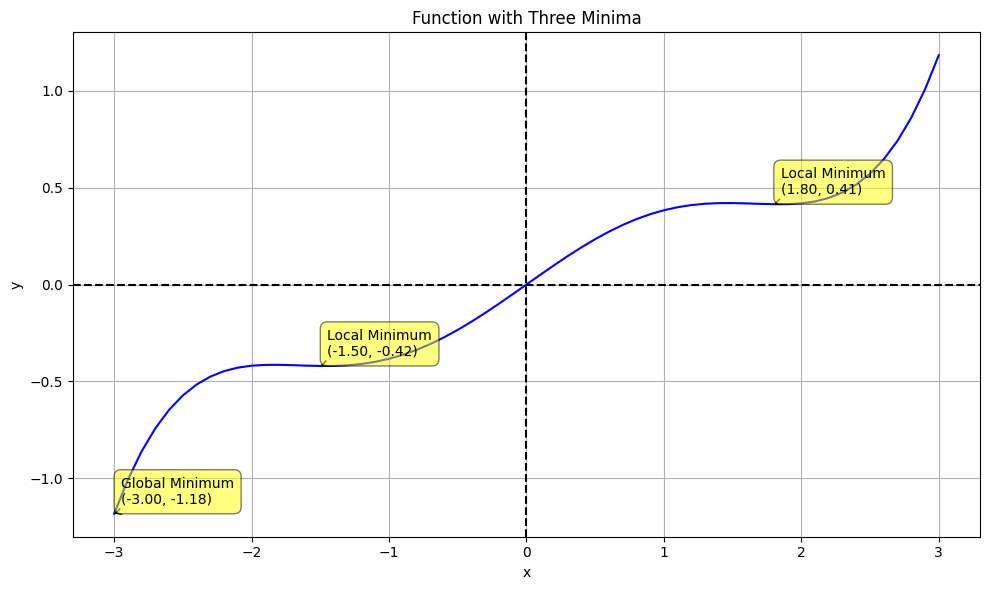

In [14]:
def custom_function(x):
    return 0.2 * (x**3) - 1.5 * x + 2 * np.sin(x)

x = np.arange(-3, 3.1, 0.1)  # Range from -3 to 3 with steps of 0.1
y = custom_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.title('Function with Three Minima')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
# Find and label local minima
local_min_x = x[np.r_[True, y[1:] < y[:-1]] & np.r_[y[:-1] < y[1:], True]]
local_min_y = custom_function(local_min_x)

for i, (x_val, y_val) in enumerate(zip(local_min_x, local_min_y)):
    if i == np.argmin(local_min_y):
        label = f'Global Minimum\n({x_val:.2f}, {y_val:.2f})'
    else:
        label = f'Local Minimum\n({x_val:.2f}, {y_val:.2f})'
    plt.annotate(label, (x_val, y_val), xytext=(5, 5), 
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

The graph above shows a function with three minima. The global minimum is the lowest point on the graph, and the local minima are the other two points. 

#### Scalar and Vector Functions

Before we move on, lets briefly touch on the concept of scalar and vector functions.

A *scalar function* is a function that takes a single or multiple inputs and returns a single output.

A *vector function* is a function that takes a single or multiple input and returns a vector output. (A vector is a list of numbers.)

We will discuss Vectors in more detail in another lesson.

### Derivatives

The *derivative* of a function is a measure of how much the output of the function changes as the input changes. It tells us how steep the function is at a given point.

The derivative of a function $f$ with respect to $x$ is denoted as $f'(x)$.

In another words, the derivative of a function $f$ is another function $f'$ that describes how fast $f$ grows or decreases as $x$ changes.

The process of finding the derivative of a function is called *differentiation*.

The derivative of a function $f$ with respect to $x$ is defined as the limit of the difference quotient as the change in $x$ approaches zero.

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

  - The derivative of a function $f$ with respect to $x$ can also be interpreted as the slope of the tangent line to the graph of $f$ at the point $x$.
  - The derivative of a function $f$ with respect to $x$ can also be interpreted as the rate of change of $f$ with respect to $x$.
  - The derivative of a function $f$ with respect to $x$ can also be interpreted as the instantaneous rate of change of $f$ with respect to $x$.

The graph below depicts this concept.

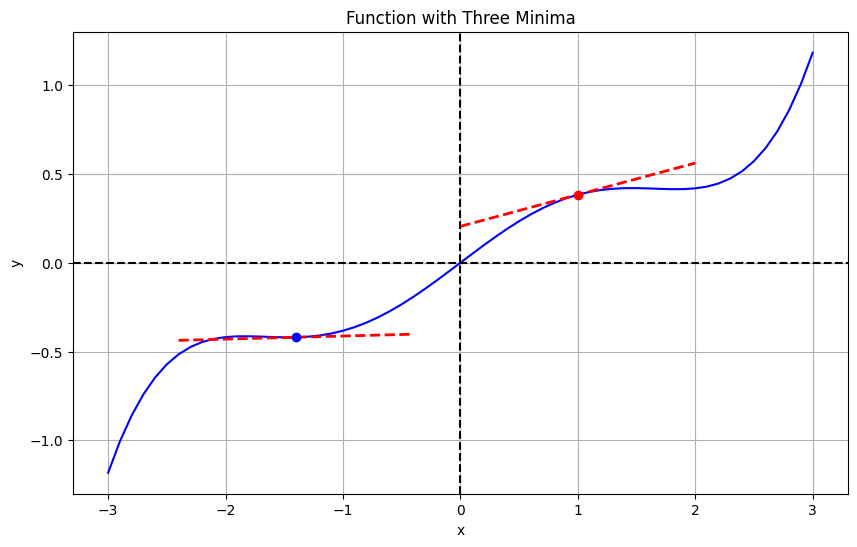

In [24]:
def custom_function(x):
    return 0.2 * (x**3) - 1.5 * x + 2 * np.sin(x)

x = np.arange(-3, 3.1, 0.1)  # Range from -3 to 3 with steps of 0.1
y = custom_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.title('Function with Three Minima')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

# Function to plot tangent line
def plot_tangent(x0, y0, slope, color='r'):
    x_tangent = np.array([x0 - 1, x0 + 1])
    y_tangent = slope * (x_tangent - x0) + y0
    plt.plot(x_tangent, y_tangent, color, linestyle='--', linewidth=2)

# show the tangent lines at x = 1.0
x1 = 1.0
h = 0.01
y1 = custom_function(x1)
slope = (custom_function(x1+h) - custom_function(x1))/h
plot_tangent(x1, y1, slope)
plt.plot(x1, y1, 'ro')  # Add a red dot at the tangent point

# show the tangent lines at x = -1.4
x2 = -1.4
h = 0.01
y2 = custom_function(x2)
slope = (custom_function(x2+h) - custom_function(x2))/h
plot_tangent(x2, y2, slope)
plt.plot(x2, y2, 'bo')  # Add a blue dot at the tangent point
plt.show()

#### Developing our intuition for derivatives

Based on the graph above, we can develop our intuition for derivatives.

1. **What is a derivative?**
   - The derivative is like the steepness of the trail at any particular spot. It tells us how quickly the elevation is changing as we walk along.  So at any point on the graph above, think of the derivative as an arrow pointing in the direction of the steepest ascent or descent.
2. **Positive and Negative Derivatives:**
   - A positive derivative means we're going uphill. If we're going uphill, the derivative depicted by the dotted line at x = 1.0 is positive.
   - A negative derivative means we're going downhill. If we're going downhill, the derivative depicted by the dotted line at x = -1.0 is negative.
   - The larger the value (positive or negative), the steeper the slope.
3. **Derivatives at Minima and Maxima:**
   - At the bottom of a valley (a minimum), the derivative is zero. We're neither going up nor down at that exact point.  In the graph above, the minima is at x = -1.4 and the derivative is depicted by the dotted line at x = -1.4 which is flat, indicating a zero derivative.
   - At the top of a hill (a maximum), the derivative is also zero for the same reason.
4. **Why are derivatives important?**
   - In hiking, knowing the steepness helps us plan our energy use.
   - In math and science, derivatives help us understand how things are changing.
   - In optimization problems (like finding the shortest path or the lowest cost), we use derivatives to find the best solution.\
5. **Intuition:**
   - Imagine rolling a ball down the hill. The derivative at any point is like the force pushing the ball.
   - At the top of a hill or bottom of a valley, the ball wouldn't roll because the derivative (the "push") is zero.

### Gradients

The *gradient* of a function is a generalization of the derivative to functions of multiple variables (i.e. functions that take multiple inputs). 

The gradient of a function is a vector that contains the partial derivatives of the function with respect to each of the input variables. So in other words, it tells us how the output of the function changes as *each* input changes.

Given a function of multiple variables:

$$
y = m_1 x_1 + m_2 x_2 + m_3 x_3 + \dots + c
$$

The gradient of the function with respect to the input variables $x_1, x_2, x_3, \dots$ is the vector:

$$
f'(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3}, \dots \right)
$$

The gradient of a function is a vector that contains the partial derivatives of the function with respect to each of the input variables. So in other words, it tells us how the output of the function changes as *each* input changes.

#### Developing our intuition for Gradients

Imagine you're hiking on a 3D terrain, like a mountain range, instead of a simple 2D hill:

1. **What is a gradient?**
  - The gradient is like a compass that tells you the steepest direction and how steep it is at any point on this 3D terrain. It's not just about going up or down anymore; it's about which direction is the steepest in any direction you could walk.
2. **Multiple directions:**
  - In our previous examples with derivatives, we only considered going forward or backward on the trail.
  - Now, imagine you can move in any direction: forward, backward, left, right, or any combination of these.
  - The gradient tells you which of these directions would make you climb or descend the fastest.
3. **Vector nature of gradients:**
  - The gradient is like an arrow pointing in the direction of the steepest ascent. So, for $f'(x)$, the gradient is a vector that has three arrows in it, one for each direction.
  - The length of each arrow tells you how steep that direction is.
  - If you were to pour water on the ground at your location, the gradient arrow would point in the opposite direction that the water would flow.
4. **Partial derivatives:**
  - The gradient is made up of partial derivatives, which are like looking at the steepness in specific directions.
  - Imagine you're only allowed to walk directly north-south or east-west. The partial derivatives tell you how steep it is in each of these directions.
  - The gradient combines this information to tell you the overall steepest direction.
5. **Gradient in hiking terms:**
  - If you're trying to reach the summit as quickly as possible, you'd want to follow the direction of the gradient at each point.
  - If you're trying to descend quickly (maybe there's a storm coming), you'd want to go in the opposite direction of the gradient.
6. **Gradient and contour lines:**
  - On a topographic map, contour lines connect points of equal elevation.
  - The gradient at any point is perpendicular to the contour line at that point, pointing towards higher elevation.
7. **Why are gradients important?**
  - For hikers, understanding the gradient helps in planning routes, estimating effort, and navigating safely.
  - In mathematics and machine learning, gradients are crucial for optimization problems - finding the quickest path to the highest point (maximum) or lowest point (minimum) of a function.
8. **Intuition:**
  - If you were to release a ball on this 3D terrain, it would roll in the opposite direction of the gradient.
  - The steeper the terrain (larger gradient magnitude), the faster the ball would roll.
By thinking about hiking in a 3D landscape, we can start to understand how gradients work with multiple variables, providing information about the direction and rate of steepest ascent or descent at any given point.

### Chain Rule

The chain rule is a fundamental rule in calculus that allows us to find the derivative of a **composed** function. For example, if we have a function 

$$ 
y = f(g(x))
$$

where \( g(x) \) is "inside" \( f(x) \), the chain rule allows us to find the derivative of \(y\) with respect to \(x\) by multiplying the derivative of the outer function by the derivative of the inner function:

$$
\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}
$$

This means that we first differentiate the outer function \(f(g(x))\) with respect to its input \(g(x)\), and then multiply it by the derivative of the inner function \(g(x)\) with respect to \(x\).

#### Example:
If we have 

$$
y = \sin(x^2)
$$

the outer function is \(\sin(u)\) where \(u = x^2\), and the inner function is \(x^2\). The chain rule gives us:

$$
\frac{dy}{dx} = \cos(x^2) \cdot 2x
$$

However, for a linear function like:

$$
y = m_1 x_1 + m_2 x_2 + m_3 x_3 + \dots + c
$$

Each variable \(x_i\) is independent, so we simply take the partial derivative of \(y\) with respect to each variable. This gives:

$$
\frac{\partial y}{\partial x_1} = m_1, \quad \frac{\partial y}{\partial x_2} = m_2, \quad \frac{\partial y}{\partial x_3} = m_3, \dots
$$

In this case, the chain rule is not needed because the function is linear and the variables \(x_1, x_2, x_3, \dots\) are not composed functions. We simply differentiate each term independently.